<a href="https://colab.research.google.com/github/BBotond03/SkinCancerDetection/blob/main/DataVisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Script for Downloading the Data
1. We download the data  through the Kaggle API (for this we will have to provide out personal API key, this can be found at Kaggle profile settings).
2. Extract the downloaded zip file

In [1]:
#to be able to download the dataset to our current runtime
!pip install kaggle

In [2]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the actual file name from the dictionary
file_name = list(uploaded.keys())[0]
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Save the API key securely without displaying it
with open('/root/.kaggle/kaggle.json', 'wb') as f:
    f.write(uploaded[file_name])

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json


Saving kaggle (4).json to kaggle (4).json
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle competitions download -c isic-2024-challenge

100% 2.00G/2.00G [01:18<00:00, 26.9MB/s]
100% 2.00G/2.00G [01:18<00:00, 27.5MB/s]


In [4]:
import zipfile
import os

# Path to your zip file and extract location
zip_file_path = 'isic-2024-challenge.zip'
extract_to_path = 'data'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)
    print("Extraction completed.")

Extraction completed.


# Data Visualisation

In [5]:
#necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [6]:
#read dataset into pandas dataframe
df = pd.read_csv('data/train-metadata.csv')

<ipython-input-6-daaeac1191b8>:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/train-metadata.csv')


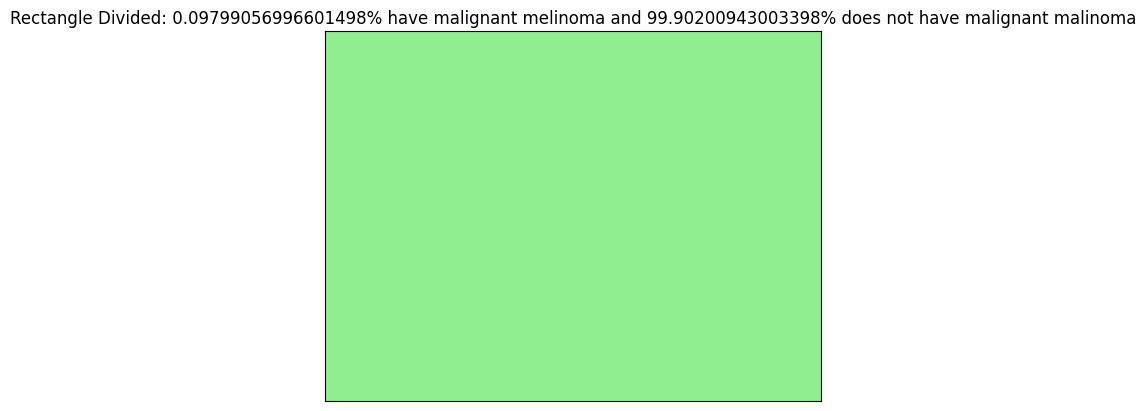

In [7]:
count_values = df['target'].value_counts()

# Assign the counts to variables(
count_1s = count_values.get(1, 0)  # Get count of 1s, default to 0 if not present
count_0s = count_values.get(0, 0)


# Example 2D list with [x, y, z] values
percentage_a = (count_1s/(count_1s+count_0s))*100  # for the first section
percentage_b = (count_0s/(count_1s+count_0s))*100   # for the second section


# Ensure percentages sum up to 100
if percentage_a + percentage_b != 100:
    raise ValueError("Percentages must sum to 100.")

# Create a figure and an axis
fig, ax = plt.subplots()

# Set the dimensions of the rectangle
width = 10  # Width of the rectangle
height = 5  # Height of the rectangle

# Calculate the width of each section based on the percentage
width_a = width * (percentage_a / 100)
width_b = width * (percentage_b / 100)

# Create the rectangles
rect_a = patches.Rectangle((0, 0), width_a, height, linewidth=1, edgecolor = None, facecolor='lightblue')
rect_b = patches.Rectangle((width_a, 0), width_b, height, linewidth=1, edgecolor = None, facecolor='lightgreen')

# Add the rectangles to the axis
ax.add_patch(rect_a)
ax.add_patch(rect_b)

# Set the limits and labels
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_xticks([])  # Hide x ticks
ax.set_yticks([])  # Hide y ticks
ax.set_title(f"Rectangle Divided: {percentage_a}% have malignant melinoma and {percentage_b}% does not have malignant malinoma")

# Show the plot
plt.show()

## Data deviation between genders

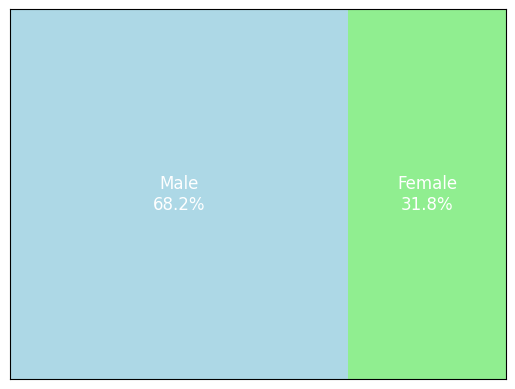

In [8]:
count_values = df['sex'].value_counts()

# Assign the counts to variables
count_1s = count_values.get('male', 0)  # Get count of males, default to 0 if not present
count_0s = count_values.get('female', 0)  # Get count of females

# Calculate percentages
percentage_a = (count_1s / (count_1s + count_0s)) * 100
percentage_b = (count_0s / (count_1s + count_0s)) * 100

# Ensure percentages sum up to 100
if percentage_a + percentage_b != 100:
    raise ValueError("Percentages must sum to 100.")

# Create a figure and an axis
fig, ax = plt.subplots()

# Set the dimensions of the rectangle
width = 10  # Width of the rectangle
height = 5  # Height of the rectangle

# Calculate the width of each section based on the percentage
width_a = width * (percentage_a / 100)
width_b = width * (percentage_b / 100)

# Create the rectangles
rect_a = patches.Rectangle((0, 0), width_a, height, linewidth=1, edgecolor = None, facecolor='lightblue')
rect_b = patches.Rectangle((width_a, 0), width_b, height, linewidth=1, edgecolor = None, facecolor='lightgreen')

# Add the rectangles to the axis
ax.add_patch(rect_a)
ax.add_patch(rect_b)

# Add labels for Male and Female
ax.text(width_a / 2, height / 2, f'Male\n{percentage_a:.1f}%', horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')
ax.text(width_a + width_b / 2, height / 2, f'Female\n{percentage_b:.1f}%', horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')

# Set the limits and labels
ax.set_xlim(0, width)
ax.set_ylim(0, height)
ax.set_xticks([])  # Hide x ticks
ax.set_yticks([])  # Hide y ticks

# Show the plot
plt.show()

## Pecentage of people from each sex having a malignant melinoma

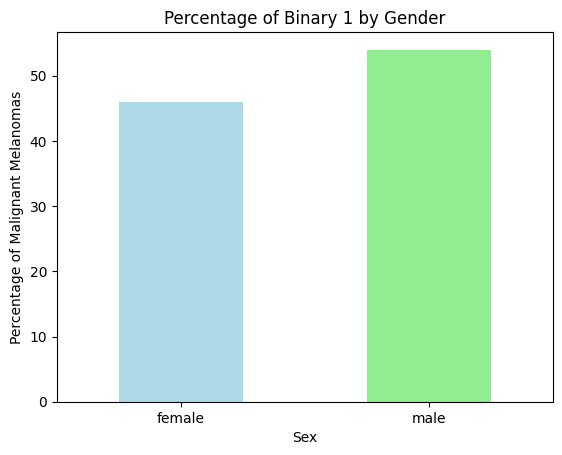

In [9]:
useful_columns = ['target', 'sex']

filtered_df = df[useful_columns]

# Group by gender and calculate the percentage of Binary == 1
percentage_ones = df.groupby("sex")["target"].mean() * 100

# Normalize so percentages add up to 100
percentage_ones_normalized = percentage_ones / percentage_ones.sum() * 100

# Plot the data using Matplotlib
percentage_ones_normalized.plot(kind="bar", color=["lightblue", "lightgreen"])

# Add labels and title to the plot
plt.ylabel("Percentage of Malignant Melanomas")
plt.xlabel("Sex")
plt.title("Percentage of Binary 1 by Gender")
plt.xticks(rotation=0)

# Show the plot
plt.show()


## Percentage of people having malignant melinoma in each age group.

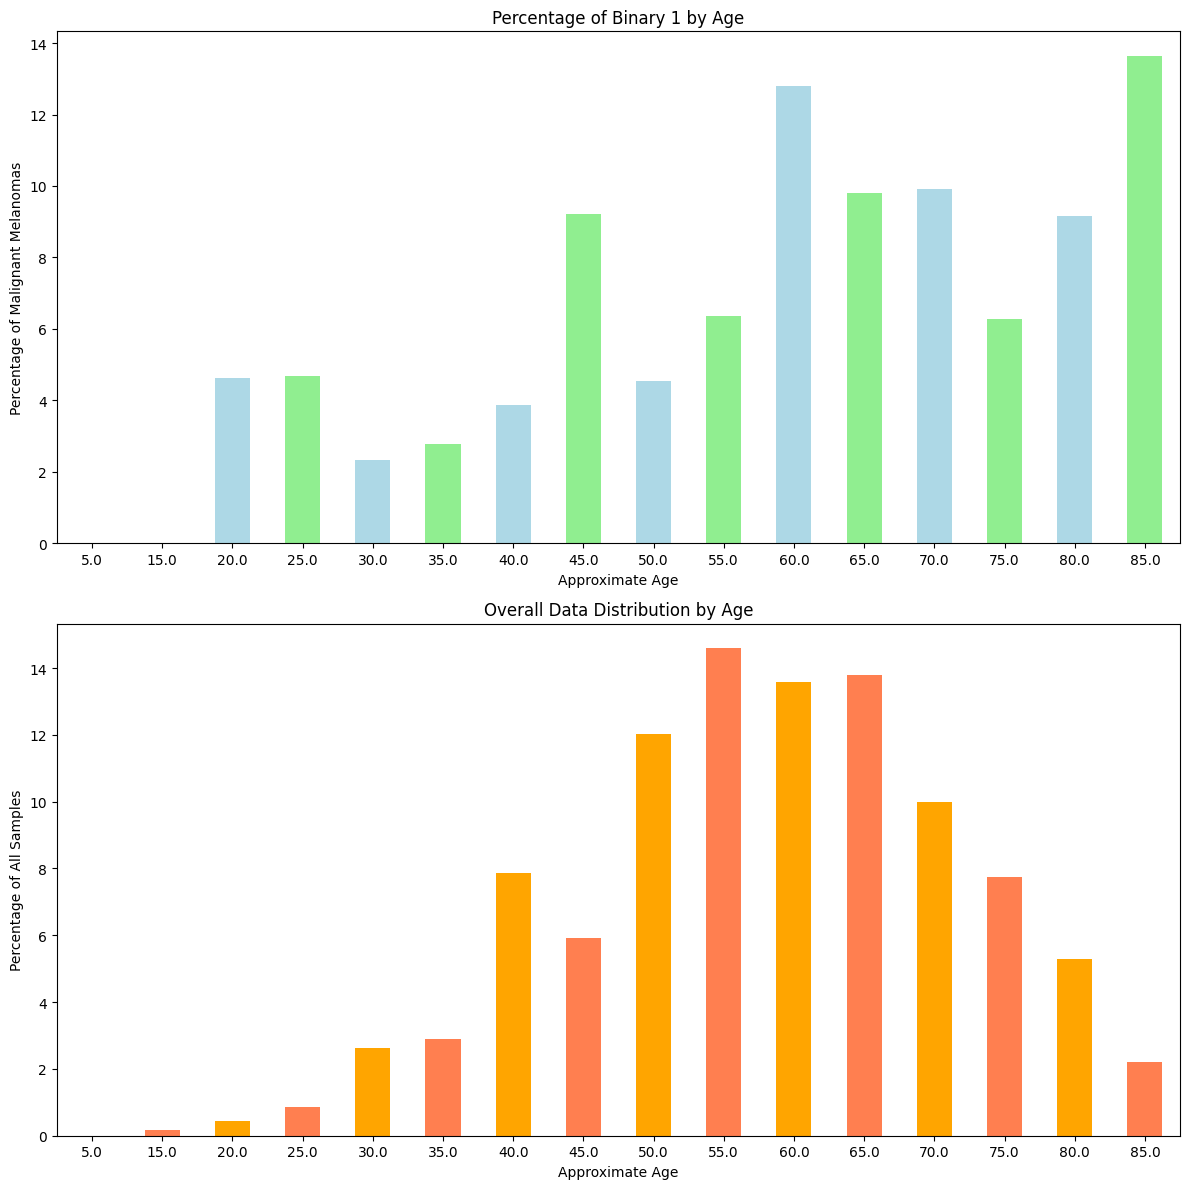

In [12]:
plt.figure(figsize=(12, 12))

# Useful columns
useful_columns = ['target', 'age_approx']
filtered_df = df[useful_columns]

# Calculate the percentage of malignant melanomas
percentage_ones = df.groupby("age_approx")["target"].mean() * 100
percentage_ones_normalized = percentage_ones / percentage_ones.sum() * 100

# Overall distribution of data
total_counts = df["age_approx"].value_counts(normalize=True).sort_index() * 100

# Plot 1: Percentage of malignant melanomas
plt.subplot(2, 1, 1)  # Create a subplot (top)
percentage_ones_normalized.plot(kind="bar", color=["lightblue", "lightgreen"])
plt.ylabel("Percentage of Malignant Melanomas")
plt.xlabel("Approximate Age")
plt.title("Percentage of Binary 1 by Age")
plt.xticks(rotation=0)

# Plot 2: Overall distribution
plt.subplot(2, 1, 2)  # Create a subplot (bottom)
total_counts.plot(kind="bar", color=["orange", "coral"])
plt.ylabel("Percentage of All Samples")
plt.xlabel("Approximate Age")
plt.title("Overall Data Distribution by Age")
plt.xticks(rotation=0)

# Adjust layout and display
plt.tight_layout()
plt.show()


## Percentage of people having malignant melinoma at each site.

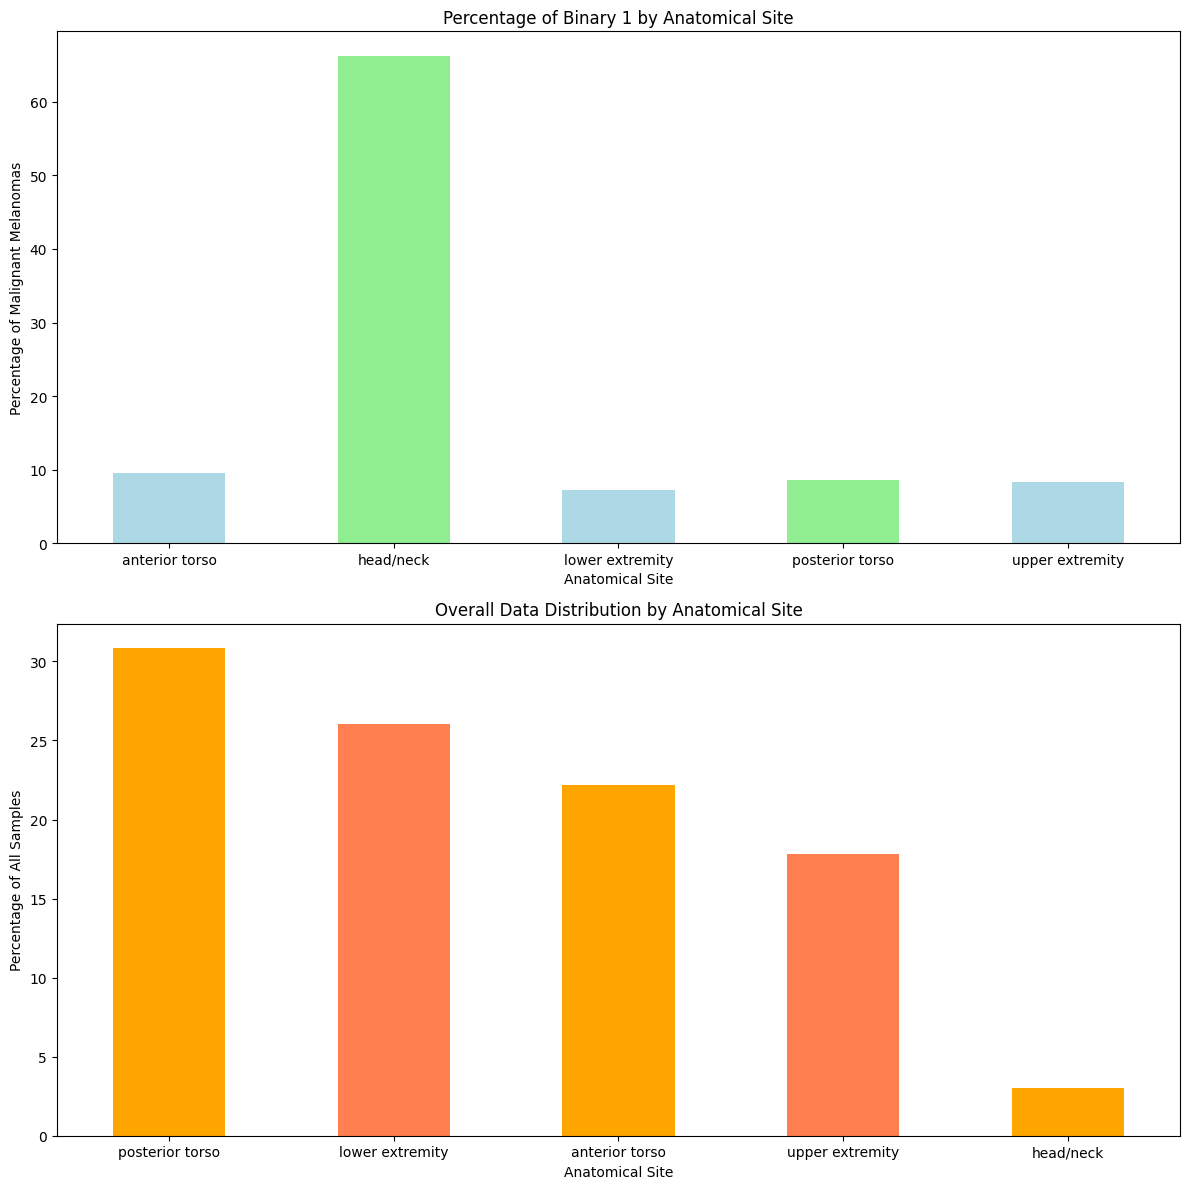

In [11]:
plt.figure(figsize=(12, 12))

# Useful columns
useful_columns = ['target', 'anatom_site_general']
filtered_df = df[useful_columns]

# Calculate the percentage of malignant melanomas
percentage_ones = df.groupby("anatom_site_general")["target"].mean() * 100
percentage_ones_normalized = percentage_ones / percentage_ones.sum() * 100

# Overall distribution of data
total_counts = df["anatom_site_general"].value_counts(normalize=True) * 100

# Plot 1: Percentage of malignant melanomas
plt.subplot(2, 1, 1)  # Create a subplot (top)
percentage_ones_normalized.plot(kind="bar", color=["lightblue", "lightgreen"])
plt.ylabel("Percentage of Malignant Melanomas")
plt.xlabel("Anatomical Site")
plt.title("Percentage of Binary 1 by Anatomical Site")
plt.xticks(rotation=0)

# Plot 2: Overall distribution
plt.subplot(2, 1, 2)  # Create a subplot (bottom)
total_counts.plot(kind="bar", color=["orange", "coral"])
plt.ylabel("Percentage of All Samples")
plt.xlabel("Anatomical Site")
plt.title("Overall Data Distribution by Anatomical Site")
plt.xticks(rotation=0)

# Adjust layout and display
plt.tight_layout()
plt.show()
